## Filtrar una curva con el filtro savgol (Savitzky-Golay) en scipy, y plotearla junto a la curva filtrada (MATPLOTLIB)

In [1]:
import lasio
import numpy as np
import pandas as pd

from scipy.signal import savgol_filter

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
las = lasio.read(r"D:\Pablo\Python\working_files\Equinor\15_9-23.las")
well = las.df()
well = well.reindex(sorted(well.columns), axis=1)  # Ordenamos las columnas alfabéticamente
pd.set_option('display.max_columns', 200)          # Muestra las primeras 200 columnas
well

,BS,CALI,DCAL,DEPTH_MD,DRHO,DTC,DTS,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,GR,NPHI,PEF,RDEP,RHOB,RMED,ROP,ROPA,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
110.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.342522,NaN,NaN,NaN
110.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.720444,NaN,NaN,NaN
110.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.098358,NaN,NaN,NaN
110.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.476280,NaN,NaN,NaN
110.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.854202,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224.328,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.749815,39.958431,NaN,NaN,NaN
3224.480,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.458361,37.414505,NaN,NaN,NaN
3224.632,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.287321,34.870579,NaN,NaN,NaN


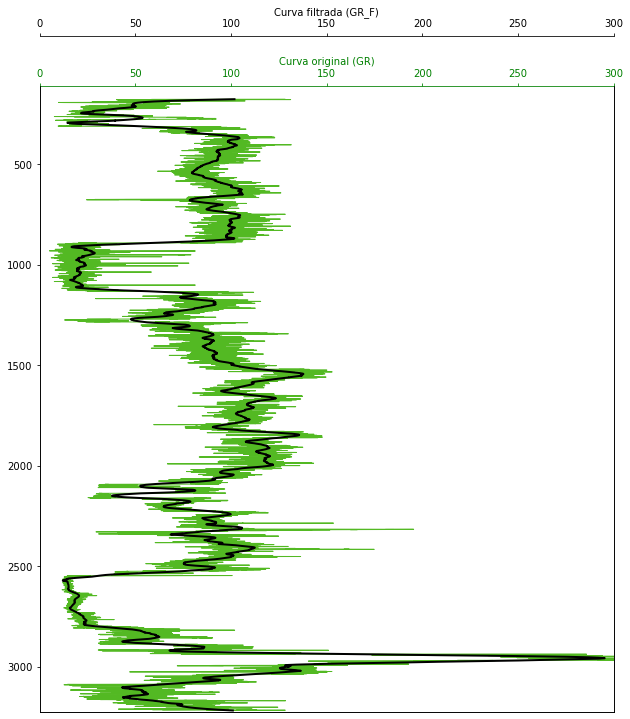

In [16]:
############################ VALORES DE ENTRADA ######################################################################

### CURVAS
crv_original = 'GR'
crv_filtered = 'GR_F'
# Escala curvas
crv_izq = 0     # a veces ploteamos en sentido inverso (por ej: porosidades)
crv_der = 300   # por eso es preferible definir izq-der en lugar de min-max 

### FILTRO
savgol_wl = 355  # Cantidad de muestras para filtrar (debe ser impar)
savgol_pol = 3   # orden del polinomio


## TOP-BOT plot
top_plot = las.well.STRT.value  # Valor default TOP del plot (modificar si es necesario)
bot_plot = las.well.STOP.value  # Valor default BOTTOM del plot (modificar si es necesario)


############################ CODIGO ######################################################################

#### Filtrar curva

well2=pd.DataFrame(well[well[crv_original].notnull()][crv_original])             # Tuve que crear otro df porque hay Nan en GR
well2[crv_filtered] = savgol_filter(well2[crv_original], savgol_wl, savgol_pol)  # (Para aplicar el filtro tengo que sacar 
well[crv_filtered]=well2[crv_filtered]                                           # los valores nulos del calculo)



### PLOT #####

fig, ax = plt.subplots(figsize=(50,10))#Set up the plot axes
   
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1) 
ax2 = ax1.twiny()

ax1.plot(well[crv_original], well.index, color = "#53B923", linewidth = 1)
ax1.set_ylim(bot_plot, top_plot)
ax1.set_xlabel(f"Curva original ({crv_original})")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(crv_izq, crv_der)
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_position(("axes", 1.0))
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")


ax2.plot(well[crv_filtered], well.index, color = "black", linewidth = 2)
ax2.set_xlabel(f"Curva filtrada ({crv_filtered})")
ax2.xaxis.label.set_color("black")
ax2.set_xlim(crv_izq, crv_der)
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.spines["top"].set_edgecolor("black")
ax2.title.set_color('black')
ax2.xaxis.set_ticks_position("top")
ax2.xaxis.set_label_position("top")


plt.tight_layout()
plt.show()